<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula06b_mlp_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

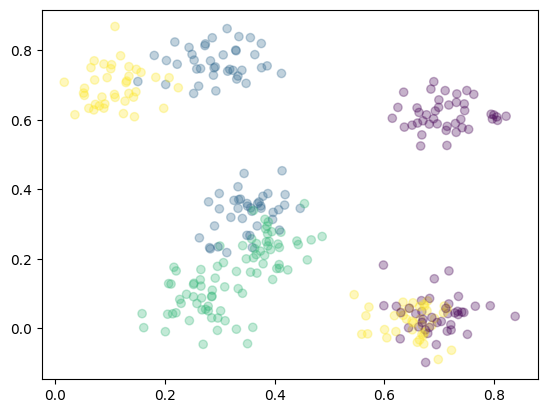

In [22]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def make_dataset(n=400, n_classes=4):
  X, y = make_blobs(n_samples=n,
                    centers=n_classes*2,
                    center_box=(0,1),
                    cluster_std=0.05)
  y = y % n_classes
  return X, y

X, y = make_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def plot_dataset(X, y):
  plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)

plot_dataset(X_train, y_train)
plt.show()

In [13]:
def define_axes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plot_predictions(clf, X):
    axes = define_axes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
train: 0.58125
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
test: 0.5125
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


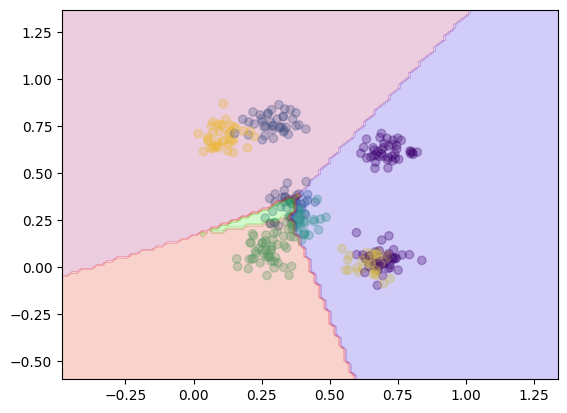

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


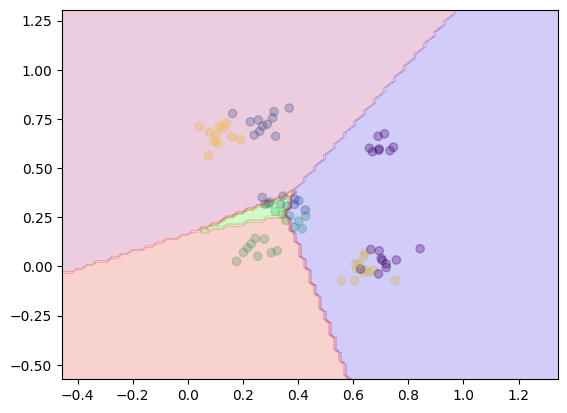

In [34]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
import numpy as np

class SLPClassifier(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=200):
    self.max_iter = max_iter
    self.model = None
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    input_shape = X.shape[1]
    output_shape = len(self.labels)
    yhot = keras.utils.to_categorical(ids, num_classes=output_shape)
    self.model = keras.Sequential([
        keras.layers.Input(shape=(input_shape,)),
        keras.layers.Dense(output_shape, activation="softmax")
    ])
    self.model.compile(optimizer="adam",
                       loss="categorical_crossentropy",
                       metrics=['accuracy'])
    self.model.fit(X, yhot, epochs=self.max_iter, verbose=0)
    return self
  def predict_proba(self, X):
    return self.model.predict(X)
  def predict(self, X):
    ypred = np.argmax(self.predict_proba(X), axis=1)
    return self.labels[ypred]

model = SLPClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_train)
print("train:", accuracy_score(y_train, ypred))
y_pred = model.predict(X_test)
print("test:", accuracy_score(y_test, y_pred))

plot_dataset(X_train, y_train)
plot_predictions(model, X_train)
plt.show()

plot_dataset(X_test, y_test)
plot_predictions(model, X_test)
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
train: 0.865625
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
test: 0.9125
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step


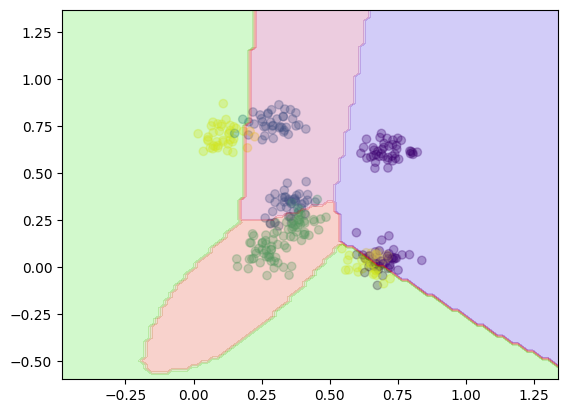

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


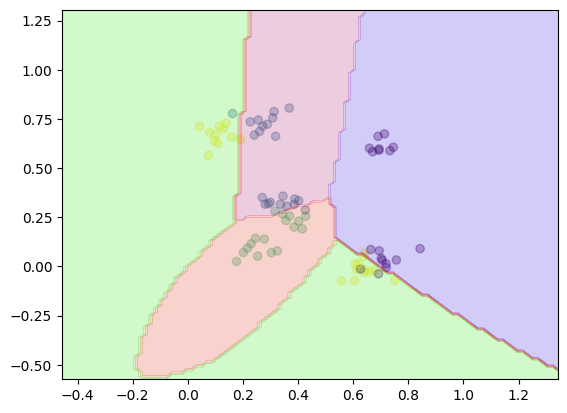

In [37]:
class SHLPClassifier(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=200):
    self.max_iter = max_iter
    self.model = None
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    input_shape = X.shape[1]
    output_shape = len(self.labels)
    yhot = keras.utils.to_categorical(ids, num_classes=output_shape)
    self.model = keras.Sequential([
        keras.layers.Input(shape=(input_shape,)),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(output_shape, activation="softmax")
    ])
    self.model.compile(optimizer="adam",
                       loss="categorical_crossentropy",
                       metrics=['accuracy'])
    self.model.fit(X, yhot, epochs=self.max_iter, verbose=0)
    return self
  def predict_proba(self, X):
    return self.model.predict(X)
  def predict(self, X):
    ypred = np.argmax(self.predict_proba(X), axis=1)
    return self.labels[ypred]

model = SHLPClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_train)
print("train:", accuracy_score(y_train, ypred))
y_pred = model.predict(X_test)
print("test:", accuracy_score(y_test, y_pred))

plot_dataset(X_train, y_train)
plot_predictions(model, X_train)
plt.show()

plot_dataset(X_test, y_test)
plot_predictions(model, X_test)
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
train: 0.871875
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
test: 0.9
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


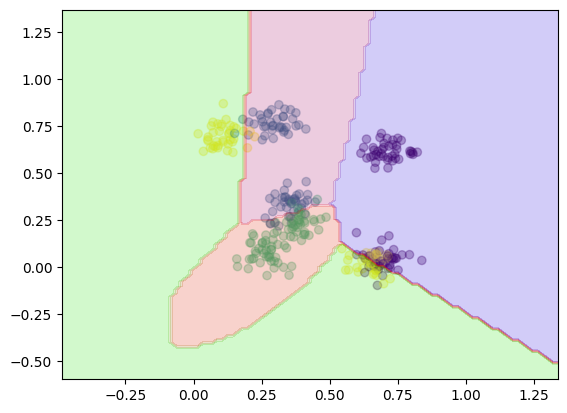

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


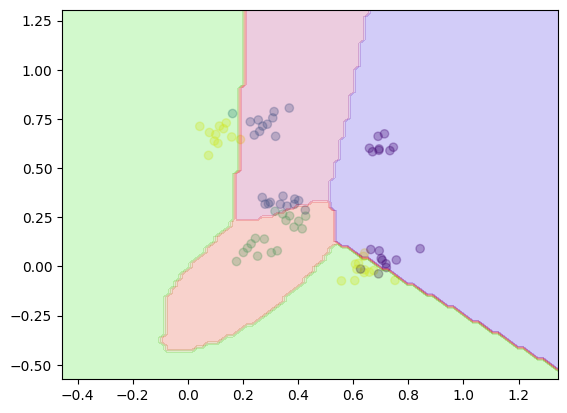

In [38]:
class MLPClassifier(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=200, n_hidden=[100]):
    self.max_iter = max_iter
    self.n_hidden = n_hidden
    self.model = None

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    input_shape = X.shape[1]
    output_shape = len(self.labels)
    yhot = keras.utils.to_categorical(ids, num_classes=output_shape)

    self.model = keras.Sequential()
    self.model.add(keras.layers.Input(shape=(input_shape,)))
    for n in self.n_hidden:
      self.model.add(keras.layers.Dense(n, activation="relu"))
    self.model.add(keras.layers.Dense(output_shape, activation="softmax"))

    self.model.compile(optimizer="adam",
                       loss="categorical_crossentropy",
                       metrics=['accuracy'])
    self.model.fit(X, yhot, epochs=self.max_iter, verbose=0)
    return self

  def predict_proba(self, X):
    return self.model.predict(X)

  def predict(self, X):
    ypred = np.argmax(self.predict_proba(X), axis=1)
    return self.labels[ypred]

model = MLPClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_train)
print("train:", accuracy_score(y_train, ypred))
y_pred = model.predict(X_test)
print("test:", accuracy_score(y_test, y_pred))

plot_dataset(X_train, y_train)
plot_predictions(model, X_train)
plt.show()

plot_dataset(X_test, y_test)
plot_predictions(model, X_test)
plt.show()